In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [11]:
labels = ['1', '2', '4', '8', '16', '32', '64', '128', '256']
ranks = [1, 2, 4, 8, 16, 32, 64, 128]
read_time_mean = {}

# read_time_std  = [0.000057, 0.000057, 0.000063, 0.000059, 0.000081, 0.00025, 0.00031, 0.00036] # on 1 image

# Median among 10
read_time_mean['1'] = [0.0036, 0.0035, 0.0036, 0.0038, 0.0037, 0.0049, 0.0056, 0.0063, 0.0057]
read_time_mean['2'] = [0.0045, 0.0045, 0.0043, 0.0048, 0.0049, 0.0066, 0.0074, 0.0080, 0.0090]
read_time_mean['3'] = [0.0057, 0.0055, 0.0057, 0.0058, 0.0056, 0.0078, 0.0084, 0.0088, 0.0096]
read_time_mean['4'] = [0.0064, 0.0063, 0.0062, 0.0062, 0.0063, 0.0089, 0.0095, 0.0100, 0.011]

labels_summit_120ranks    = [1,     2,   3,     4,    8,    16,    32,    64,    128,   256,    512]
read_time_summit_120ranks = [0.001823,0.00238,0.00290,0.00336,0.00499, 0.00825, 0.01472, 0.03179, 0.03183, 0.06639, 0.122987]    

x = np.arange(len(labels)) # the label locations
width = 0.2  # the width of the bars

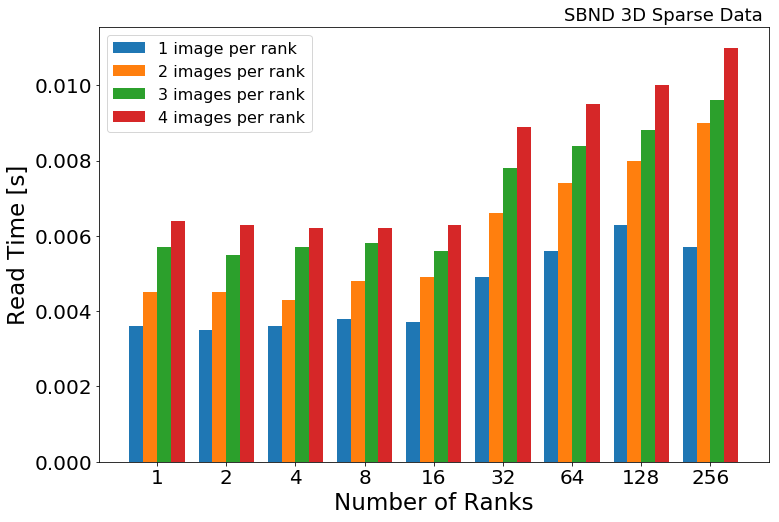

In [12]:
fig, ax = plt.subplots(figsize=(12,8),facecolor='w')
rects1 = ax.bar(x - 3*width/2, read_time_mean['1'], width, label='1 image per rank')
rects2 = ax.bar(x - width/2, read_time_mean['2'], width, label='2 images per rank')
rects3 = ax.bar(x + width/2, read_time_mean['3'], width, label='3 images per rank')
rects4 = ax.bar(x + 3*width/2, read_time_mean['4'], width, label='4 images per rank')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Read Time [s]',fontsize=23)
ax.set_xlabel('Number of Ranks',fontsize=23)
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
leg=ax.legend(fontsize=16,loc=0)
leg_frame=leg.get_frame()
leg_frame.set_facecolor('white')
plt.tick_params(labelsize=20)

plt.title('SBND 3D Sparse Data ', loc='right', fontsize=18)

# autolabel(rects1)
# autolabel(rects2)

fig.savefig('scaling.pdf')
plt.show()

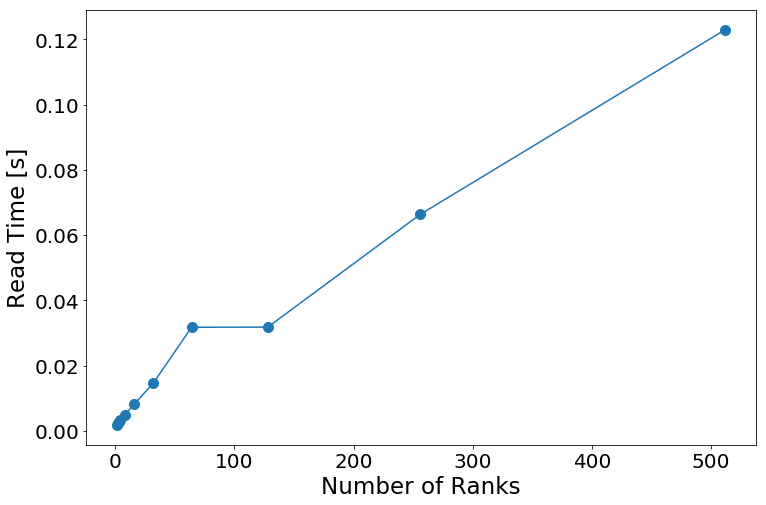

In [5]:
fig = plt.figure(figsize=(12,8),facecolor='w')
ax = fig.add_subplot(1,1,1)
plt.plot(labels_summit_120ranks, read_time_summit_120ranks, 'o-', markersize=10, label='n20_r6')
# ax.legend(numpoints=1, loc='upper left')
# leg=plt.legend(fontsize=20,loc=0)
# leg_frame=leg.get_frame()
# leg_frame.set_facecolor('white')
plt.ylabel('Read Time [s]',fontsize=23)
plt.xlabel('Number of Ranks',fontsize=23)
plt.tick_params(labelsize=20)
plt.show()
# plt.savefig('time_vs_gpu_128.pdf')